<h1>Introduction</h1>

This is a Jupyter notebook outlining the results of 500 Wonder Trades over the course of nearly a week. The purpose of this notebook is two-fold:

<ol>
    <li>Showcase the data I collected</li>
    <li>Learn/practice some data science skills</li>
</ol>

<h2>What is Wonder Trade?</h2>

Wonder Trade is a feature in the main series Pokemon games that allows you trade one of your Pokemon with a partner. In return, you receive a Pokemon they have elected to trade. The partner chosen is, as far as I know, randomly chosen from around the world.

<h2>Procedure</h2>

The Pokemon I chose to use for this endeavor was Mareanie. This choice came about as a result of a desire to distribute a Pokemon that is relatively difficult to find in the game.

I started by breeding Mareanies in the Paniola Ranch until I had entire boxful (30 Mareanies). Once I had hatched 30, I connected to the Internet and started Wonder Trading. Once I found a partner, I noted the time of connection, date of connection, and Trainer's region. Additionally, I recorded the state of any trainer located in the United States. The reason for not recording the subregion of non-American locations was mainly due to my unfamiliarity. Because I am the most familiar with the 50 United States, it was relatively trivial to record the states from which trainers were trading. However, I am not very familiar with the regions within other countries, meaning it would be more difficult to keep track of these subregions.

After Wonder Trading an entire box of Mareanies, I went into the box with the received Pokemon and started collecting data by viewing the Pokemon's summary. The following data were collected about each Pokemon:

<ul>
    <li>Species</li>
    <li>Pokemon Language</li>
    <li>Level</li>
    <li>Level Met</li>
    <li>Gender</li>
    <li>Type 1</li>
    <li>Type 2</li>
    <li>Nature</li>
    <li>Pokeball</li>
    <li>Presence of Held Item</li>
    <li>Number of Perfect IVs</li>
</ul>

<h2>Miscellaneous Information</h2>

Shoutout to the <a href="http://partiallyderivative.com/">Partially Derivative</a> podcast for keeping me sane while I hatched and Wonder Traded 500 Mareanies.

Please keep in mind that this data collection process was very unscientific. Ideally, I would have Wonder Traded Mareanies at all times of the day to account for time zones, working people, etc. However, I do enjoy sleep and as a result the majority of my Wonder Trades occurred from 8:00 to 23:00 CST. All these results are just for fun and should not be taken as indicative of Wonder Trade as a whole.

Thanks for checking my work out!

<h2>Notebook Preparation</h2>

I'll be using the *ggplot2* R library for better graphics creation and the *repr* library to modify plot representation.

In [1]:
library(repr)
library(ggplot2)

<h2>Data Import</h2>

First and foremost, we should probably import the data.

In [2]:
wtdata <- read.csv("Wonder Trade.csv", header=T)
attach(wtdata)

Let's take a look at the data format.

In [3]:
head(wtdata)

,Date,Time,Pokemon,Trainer.Region,Trainer.Subregion,Pokemon.Region,Level,Level.Met,Gender,Type1,Type2,Nature,Pokeball,Held.Item,Perfect.IVs
1,12/13/16,17:28,Oricorio,South Korea,,,13,10,F,Electric,Flying,Sassy,Poke,0,0
2,12/13/16,17:30,Zubat,United States,Texas,GER,8,8,M,Poison,Flying,Hardy,Poke,0,1
3,12/13/16,17:31,Carbink,United States,Oklahoma,,10,10,N,Rock,Fairy,Relaxed,Poke,0,0
4,12/13/16,17:33,Klefki,United States,Connecticut,,29,29,M,Steel,Fairy,Jolly,Quick,0,0
5,12/13/16,17:34,Luvdisc,United States,,,16,16,M,Water,,Naughty,Quick,0,0
6,12/13/16,17:35,Roggenrola,United Kingdom,,SPA,10,10,M,Rock,,Modest,Poke,0,1


Looks pretty good. Whoever collected this data must have been an expert. Note that the empty cells in the Pokemon Region variable just mean that the relevant Pokemon was an English language Pokemon.

<h2>Pokemon</h2>

The most received Pokemon are...

In [4]:
head(data.frame(sort(table(Pokemon), decreasing=T)))

,Pokemon,Freq
1,Abra,27
2,Magikarp,20
3,Mimikyu,19
4,A.Rattata,16
5,Wingull,16
6,Yungoos,16


Whoa, the Mimikyu is pretty interesting. The other Pokemon make sense as they are available very early and people are more willing to trade "trash" Pokemon. I guess a lot of people are breeding Mimikyus.

<h2>Level Distribution</h2>

I wonder what the level distribution is for all of these Pokemon.

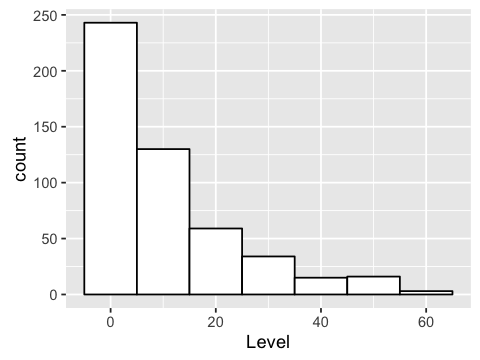

In [5]:
options(repr.plot.width=4, repr.plot.height=3)

leveldist <- ggplot(data.frame(Level), aes(x=Level))
leveldist + geom_histogram(binwidth=10, colour="black", fill="white")

Wow, the data is super skewed to the lower levels. Let's view this distribution at a log scale instead.

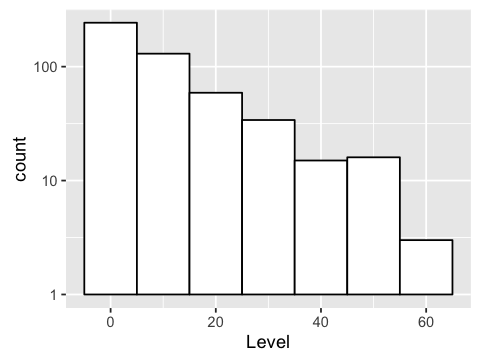

In [6]:
leveldist + geom_histogram(binwidth=10, colour="black", fill="white") + scale_y_log10()

That certainly looks a lot better, but it doesn't answer *why* the data are so skewed towards the lower levels. I wonder how many received Pokemon were hatched from eggs...

In [7]:
eggs <- wtdata[Level.Met==1,]
noneggs <- wtdata[Level.Met!=1,]
nrow(eggs)

[1] 208

Well... that certainly is a lot of eggs. Let's see how the data look *without* all the eggs.

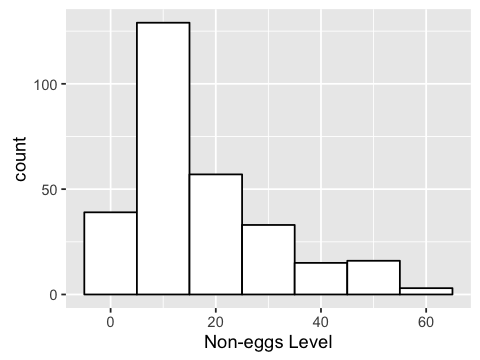

In [8]:
leveldistnoeggs <- ggplot(data.frame(noneggs$Level), aes(x=noneggs$Level))
leveldistnoeggs + geom_histogram(binwidth=10, colour="black", fill="white") + labs(x="Non-eggs Level")

Alright, neat! Looks like the data are still skewed towards the lower levels but this histogram looks a lot nicer than the one including the eggs. However, this brings up a question: how many people just Wonder Trade away their eggs as soon as they've hatched?

In [9]:
length(which(Level.Met==1 & Level!=1))

[1] 4

Out of 208 Pokemon hatched from eggs, only 4 were ever leveled up past level 1. Kind of sad when you think about it...

Anyway, I wonder how much the Pokemon levels varied by day?

In [10]:
median_level_bydate <- aggregate(Level, by=list(Date), FUN=median)
colnames(median_level_bydate) <- c("Date", "Median Level")
median_level_bydate

,Date,Median Level
1,12/13/16,11
2,12/14/16,10
3,12/15/16,1
4,12/16/16,7
5,12/17/16,5
6,12/18/16,7


Interesting! Looks like there were a lot of eggs on December 15th!

<h2>Gender</h2>

Let's take a look at the gender distribution of all the received Pokemon.

In [11]:
summary(data.frame(Gender))

 Gender 
 F:210  
 M:261  
 N: 29  

That's quite a lot more males than I would have expected. My guess was that there'd be a relatively equal number of males and females with a small number of genderless Pokemon. Do you think there's any relationship between level and gender?

In [12]:
t.test(Level[Gender=="M"], Level[Gender=="F"])


	Welch Two Sample t-test

data:  Level[Gender == "M"] and Level[Gender == "F"]
t = -0.80327, df = 448.78, p-value = 0.4222
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.373206  1.415790
sample estimates:
mean of x mean of y 
 10.22605  11.20476 


A p-value of 0.4222 means we fail to reject the null hypothesis. I guess we can't draw any conclusions about gender vs. level for this dataset.

<h2>Types</h2>

One of the most important parts of Pokemon is what type(s) they are. Let's look at an overview of the type distribution of the received Pokemon.

In [13]:
Type1 <- as.character(Type1)
Type2 <- as.character(Type2)

types <- c(Type1, Type2[Type2!=""])
typedf <- data.frame(table(types))
colnames(typedf) <- c("Type", "Freq")
typedf

,Type,Freq
1,Bug,46
2,Dark,48
3,Dragon,25
4,Electric,28
5,Fairy,37
6,Fighting,18
7,Fire,32
8,Flying,97
9,Ghost,32
10,Grass,27


From a cursory overview it looks like Flying and Normal types make up a plurality of types. Let's see this in barplot form.

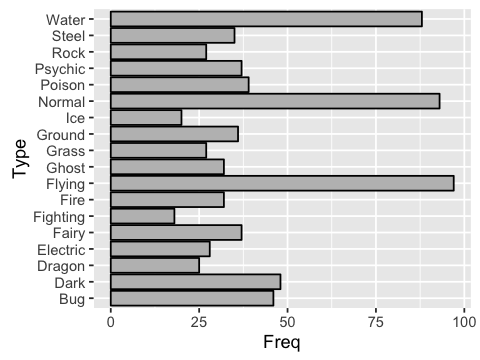

In [14]:
typeplot <- ggplot(data=typedf, aes(x=Type, y=Freq))
typeplot + geom_bar(colour="black", fill="grey", stat="identity") + coord_flip()

<h2>Regions</h2>

I traded with so many people from so many countries during this process. It'll be interesting to see all the different places people are playing Pokemon.

In [15]:
tregiondf <- data.frame(table(Trainer.Region))
colnames(tregiondf) <- c("Trainer Region", "Freq")
tregiondf

,Trainer Region,Freq
1,Anguilla,2
2,Australia,2
3,Austria,3
4,Belgium,3
5,Brazil,5
6,Canada,15
7,Chile,1
8,Finland,3
9,France,27
10,Germany,43


Turns out I traded with people from 27 different countries (with Japan and U.S. being the most numerous by far). I wonder how many U.S. states were represented?

In [16]:
trainerstates <- Trainer.Subregion[Trainer.Subregion!=""]
length(unique(trainerstates))

[1] 38

Wow, 37 states (+DC)! Which ones weren't represented?

In [17]:
data(state)
setdiff(state.name, unique(Trainer.Subregion))

[1] "Arizona"       "Arkansas"      "Hawaii"        "Iowa"         
 [5] "Kentucky"      "Maine"         "Nebraska"      "New Mexico"   
 [9] "North Dakota"  "Rhode Island"  "South Dakota"  "West Virginia"
[13] "Wyoming"

Step it up, guys.

In [18]:
trainerstatedf <- data.frame(table(droplevels(Trainer.Subregion[Trainer.Subregion!=""])))
colnames(trainerstatedf) <- c("State", "Freq")
trainerstatedf

,State,Freq
1,Alabama,1
2,Alaska,2
3,California,15
4,Colorado,3
5,Connecticut,2
6,DC,1
7,Delaware,1
8,Florida,9
9,Georgia,3
10,Idaho,1


Looks like on average the most populous states had the most Wonder Trades. No surprise there.

<h2>Nature</h2>

There are a total of 25 natures available to Pokemon. 20 of these natures boost one stat while decreasing another. 5 of these natures are neutral and do not affect the Pokemon's stats at all.

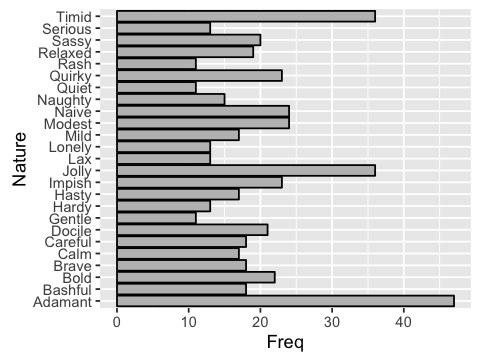

In [19]:
naturedf <- data.frame(table(Nature))
natureplot <- ggplot(data=naturedf, aes(x=Nature, y=Freq))
natureplot + geom_bar(stat="identity", colour="black", fill="grey") + coord_flip()

What's interesting here is that the most common natures are Adamant, Timid, and Jolly. Maybe this is because these are all very common natures in the competitive scene, so many 'breedjects' have these natures.

In [20]:
length(which(Nature=="Adamant"))/length(Nature)*100

[1] 9.4

A whopping *9.4%* of the Pokemon I received were Adamant nature. That's pretty insane considering there are 25 natures.

<h2>Pokeball</h2>

The type of Pokeball in which the received Pokemon was in could give insight into Pokemon catching/hatching habits.

In [21]:
balldf <- data.frame(table(Pokeball))
balldf

,Pokeball,Freq
1,Beast,15
2,Dive,12
3,Dusk,16
4,Great,58
5,Heal,7
6,Heavy,3
7,Love,3
8,Luxury,9
9,Master,1
10,Moon,5


Looks like the Pokeball was by far the most common ball, followed by Great, Ultra, and Quick. The Quick Ball is incredibly useful as a Pokeball because it makes catching Pokemon significantly easier as you can just toss one out at the beginning of battle to capture a Pokemon.

One thing that surprised me was the number of Pokemon in Beast Balls. Nowadays it is very common for people to try to catch pokemon other than Ultra Beasts with Beast Balls, likely because of the cool design.
<img src="beastball.jpg" alt="Beast Ball">

In [22]:
beastballfreq <- data.frame(table(droplevels(Pokemon[Pokeball=="Beast"])))
colnames(beastballfreq) <- c("Pokemon", "Freq")
beastballfreq

,Pokemon,Freq
1,A.Grimer,1
2,Absol,1
3,Bagon,1
4,Beldum,1
5,Deino,1
6,Gible,5
7,Magikarp,1
8,Mareanie,1
9,Riolu,1
10,Shinx,1


Looks like a lot of people want Beast Ball Garchomps judging by the frequency of Gibles.

<h2>Perfect IVs</h2>

For those who take part in the competitive Pokemon scene, IVs are crucial. In most cases, a competitive Pokemon will have at least 5 "perfect" IVs, meaning their value is the maximum (31). I wanted to see how many Pokemon I received had any perfect IVs.

In [23]:
ivdf <- data.frame(table(Perfect.IVs))
colnames(ivdf) <- c("Number of Perfect IVs", "Freq")
ivdf

,Number of Perfect IVs,Freq
1,0,301
2,1,85
3,2,31
4,3,37
5,4,25
6,5,19
7,6,2


As expected, the majority of Pokemon had 0 perfect IVs. Without a concerted effort to obtain perfect IVs, it is unlikely that any Pokemon has an IV stat of 31. However, one of the main purposes of breeding is to obtain a Pokemon with (usually 5) perfect IVs. Let's see the perfect IV distriubtion of Pokemon hatched from eggs.

In [24]:
eggivdf <- data.frame(table(Perfect.IVs[Level.Met==1]))
colnames(eggivdf) <- c("Number of Perfect IVs (Hatched)", "Freq")
eggivdf

,Number of Perfect IVs (Hatched),Freq
1,0,69
2,1,32
3,2,26
4,3,36
5,4,25
6,5,19
7,6,1


As you can see, the majority of the Pokemon with multiple perfect IVs were hatched from eggs. Let's do a t-test to see how the number of perfect IVs compares between hatched Pokemon and non-hatched Pokemon.

In [25]:
t.test(Perfect.IVs[Level.Met==1], Perfect.IVs[Level.Met!=1], alternative="greater")


	Welch Two Sample t-test

data:  Perfect.IVs[Level.Met == 1] and Perfect.IVs[Level.Met != 1]
t = 13.08, df = 240.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.435452      Inf
sample estimates:
mean of x mean of y 
1.8894231 0.2465753 


With such a small p-value, we can reject the null hypothesis and conclude that there is statistically significant evidence that the number of perfect IVs in hatched Pokemon is greater than that of non-hatched Pokemon.

Finally, if you are curious, the two Pokemon with 6 perfect IVs were a Salandit and a Lunala. The Salandit was male, meaning it is unable to evolve (and thus of no use to a competitive trainer). The Lunala was actually likely hacked seeing as it was:

<ol type="a">
    <li>A Wonder Traded Lunala</li>
    <li>Holding a Master Ball</li>
    <li>6 perfect IVs</li>
</ol>

<h2>Conclusion</h2>

A lot of interesting data came out of this. I had a lot of fun collecting and analyzing this data and I hope you all found some of this interesting. Keep in mind that this data/analysis should not be taken as representative of Wonder Trade as a whole; this was done mostly to learn about R and basic data science. Feel free to use any of this analysis/dataset for your own work. I would love to see what kind of neat stuff other people come up with.